In [1]:
import pandas as pd, matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
drinking_file = "Resources/drinkingwater.csv"
sani_file = "Resources/sanitization.csv"
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [3]:
drinking_data = pd.read_csv(drinking_file)
sani_data = pd.read_csv(sani_file)
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [4]:
# Merge Life Expectancy and HALE Healthy life expectancy Data

life_results = pd.merge(life_data, hale_data, how="inner", on=["Location","Period","Sex"])
life_results = life_results.rename(columns = {"Life expectancy at birth (years)": "Life_(years)", "Healthy life expectancy (HALE) at birth (years)":"HALE_(years)"})
life_results.head()

,Location,Period,Sex,Life_(years),HALE_(years)
0,Afghanistan,2019,Both sexes,63.21,53.95
1,Afghanistan,2019,Male,63.29,54.73
2,Afghanistan,2019,Female,63.16,53.15
3,Afghanistan,2015,Both sexes,61.65,52.60
4,Afghanistan,2015,Male,61.04,52.78


In [5]:
# Edit the names to shorter names
life_results["Location"] = life_results["Location"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "United States of America": "United States"})

In [6]:
# Filter out the countries we want:

filtered_countries_df = pd.DataFrame(life_results.query('Location == ["Switzerland","Canada", "Japan", "Germany", "Australia", "United States", "United Kingdom", "Liberia", "Nigeria", "Madagascar"]'))

countries = filtered_countries_df["Location"].unique()
countries


array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [7]:
#filtered_countries_df['Period'] = [dt.datetime.strptime(str(period), '%Y') for period in filtered_countries_df['Period']]


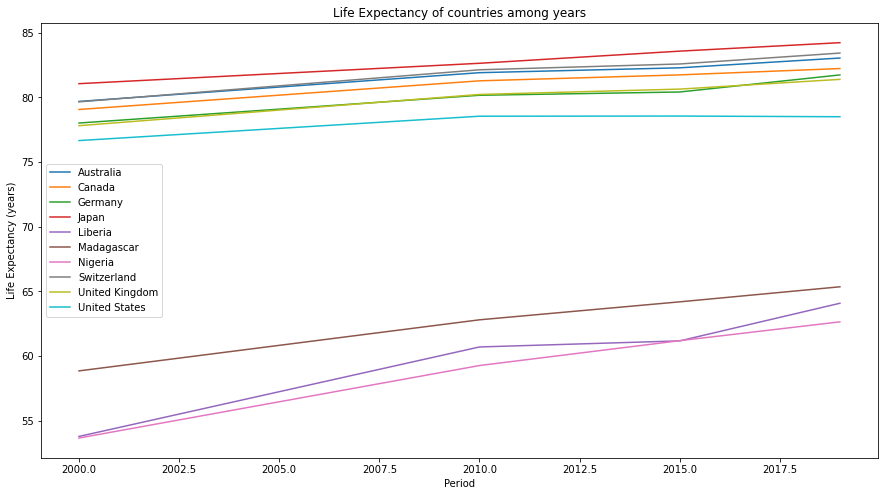

In [8]:
#  Life Expectancy of countries among years 

plt.figure(figsize = (15, 8))

for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country][["Location","Period","Life_(years)"]].groupby("Period").mean()
 
    plt.plot(df.index, df["Life_(years)"], label = country)

plt.xlabel("Period")
plt.ylabel("Life Expectancy (years)")
plt.title("Life Expectancy of countries among years")
plt.legend()    
plt.savefig("My Project Images/ Life Expectancy among years.png",bbox_inches ="tight")

plt.show()

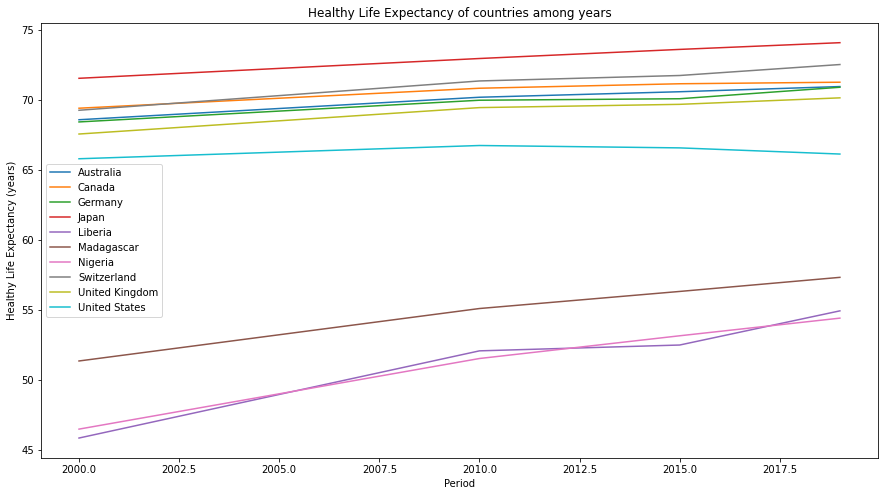

In [9]:
# Healthy HALE Life Expectancy of countries among years

plt.figure(figsize = (15, 8))

for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country][["Location","Period","HALE_(years)"]].groupby("Period").mean()
 
    plt.plot(df.index, df["HALE_(years)"], label = country)

plt.xlabel("Period")
plt.ylabel("Healthy Life Expectancy (years)")
plt.title("Healthy Life Expectancy of countries among years")
plt.legend()    
plt.savefig("My Project Images/ Healthy Life Expectancy among years.png",bbox_inches ="tight")
plt.show()

In [10]:
# Set the Data Frame in years

life_2000 = pd.DataFrame(filtered_countries_df.query("Period == '2000'"))
life_2010 = pd.DataFrame(filtered_countries_df.query("Period == '2010'"))
life_2015 = pd.DataFrame(filtered_countries_df.query("Period == '2015'"))
life_00and10 = filtered_countries_df.query("Period == 2000 | Period == 2010")

years = [life_2000, life_2010, life_2015]


,Period,Life_(years),HALE_(years)
Location,,,
United States,2000,76.660000,65.780000
United Kingdom,2000,77.810000,67.546667
Switzerland,2000,79.653333,69.243333
Nigeria,2000,53.653333,46.470000
Madagascar,2000,58.846667,51.336667
Liberia,2000,53.776667,45.833333
Japan,2000,81.060000,71.526667
Germany,2000,78.016667,68.410000
Canada,2000,79.063333,69.390000


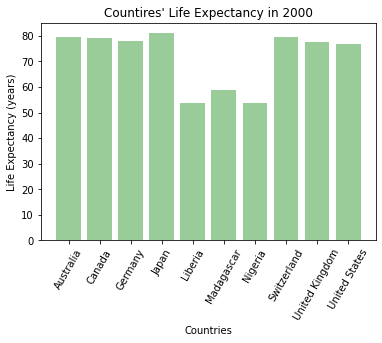

,Period,Life_(years),HALE_(years)
Location,,,
United States,2010,78.543333,66.726667
United Kingdom,2010,80.226667,69.433333
Switzerland,2010,82.133333,71.336667
Nigeria,2010,59.260000,51.513333
Madagascar,2010,62.796667,55.083333
Liberia,2010,60.696667,52.060000
Japan,2010,82.636667,72.940000
Germany,2010,80.163333,69.960000
Canada,2010,81.280000,70.816667


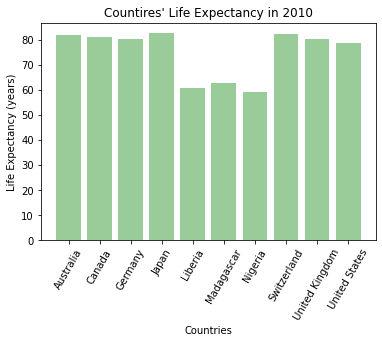

,Period,Life_(years),HALE_(years)
Location,,,
United States,2015,78.556667,66.556667
United Kingdom,2015,80.640000,69.666667
Switzerland,2015,82.583333,71.726667
Nigeria,2015,61.183333,53.136667
Madagascar,2015,64.186667,56.303333
Liberia,2015,61.166667,52.476667
Japan,2015,83.576667,73.590000
Germany,2015,80.416667,70.066667
Canada,2015,81.740000,71.136667


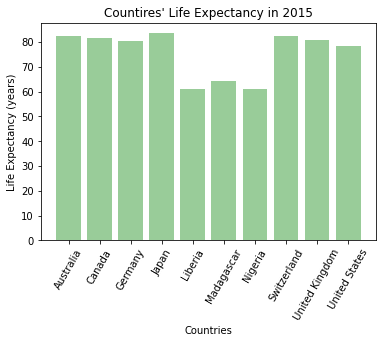

In [11]:
# Group by mean for life expectancy for each country and make a bar chart for it in a loop
numYears = ['2000', '2010', '2015']

for index, year  in enumerate(years):
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))
    plt.bar(life_summary.index,life_summary["Life_(years)"],color = "green", alpha = 0.4)
    plt.xticks(rotation = 60)
    plt.title("Countires' Life Expectancy in " + numYears[index])
    plt.xlabel("Countries")
    plt.ylabel("Life Expectancy (years)")

    plt.savefig("My Project Images/ Countries Life Expectancy in " + numYears[index] + ".png", bbox_inches ="tight")

    plt.show()


,Period,Life_(years),HALE_(years)
Location,,,
United States,2000,76.660000,65.780000
United Kingdom,2000,77.810000,67.546667
Switzerland,2000,79.653333,69.243333
Nigeria,2000,53.653333,46.470000
Madagascar,2000,58.846667,51.336667
Liberia,2000,53.776667,45.833333
Japan,2000,81.060000,71.526667
Germany,2000,78.016667,68.410000
Canada,2000,79.063333,69.390000


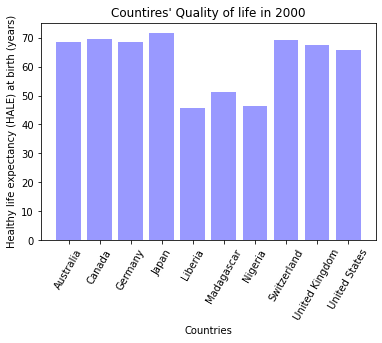

,Period,Life_(years),HALE_(years)
Location,,,
United States,2010,78.543333,66.726667
United Kingdom,2010,80.226667,69.433333
Switzerland,2010,82.133333,71.336667
Nigeria,2010,59.260000,51.513333
Madagascar,2010,62.796667,55.083333
Liberia,2010,60.696667,52.060000
Japan,2010,82.636667,72.940000
Germany,2010,80.163333,69.960000
Canada,2010,81.280000,70.816667


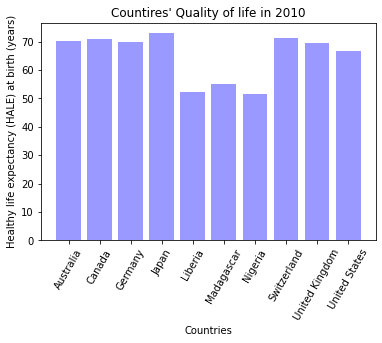

,Period,Life_(years),HALE_(years)
Location,,,
United States,2015,78.556667,66.556667
United Kingdom,2015,80.640000,69.666667
Switzerland,2015,82.583333,71.726667
Nigeria,2015,61.183333,53.136667
Madagascar,2015,64.186667,56.303333
Liberia,2015,61.166667,52.476667
Japan,2015,83.576667,73.590000
Germany,2015,80.416667,70.066667
Canada,2015,81.740000,71.136667


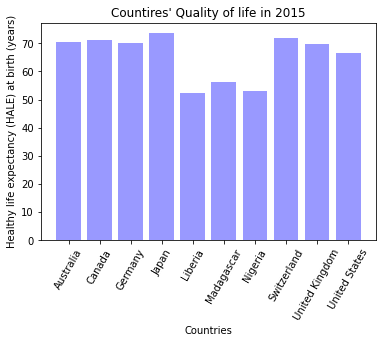

In [12]:
# Group by mean for Healthy life expectancy for each country and make a bar chart for it in a loop

numYears = ['2000', '2010', '2015']

for index, year  in enumerate(years):
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))
    plt.bar(life_summary.index,life_summary["HALE_(years)"], color = "blue", alpha = 0.4)
    plt.xticks(rotation = 60)
    plt.title("Countires' Quality of life in " + numYears[index])
    plt.xlabel("Countries")
    plt.ylabel("Healthy life expectancy (HALE) at birth (years)")

    plt.savefig("My Project Images/ Countries Life Expectancy in " + numYears[index] + ".png", bbox_inches ="tight")
    plt.show()

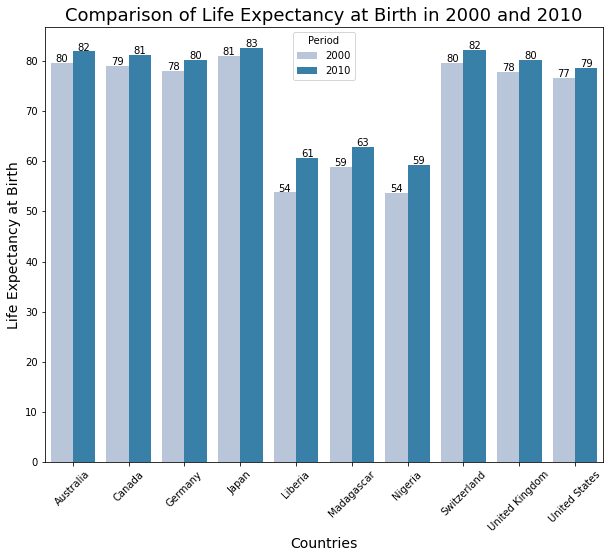

In [13]:
# Bar graph for gender and Life Expectancy among Countries in 2000 VS 2010
plt.figure(figsize=(10, 8))
graph = sns.barplot(x= "Location", 
    y="Life_(years)",
    hue = "Period",
    data = life_00and10,
    ci=None,
    palette = ("PuBu"))

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Comparison of Life Expectancy at Birth in 2000 and 2010", size=18)

# show values on each bar in graph
for p in graph.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 graph.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

plt.savefig("My Project Images/ 2000 and 2010 Life Expectancy among countries.png",bbox_inches ="tight")

plt.show()

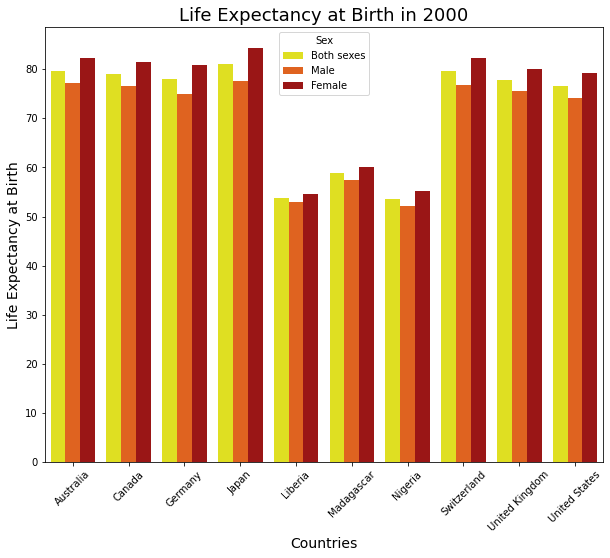

In [14]:
# Bar graph for gender and Life Expectancy among Countries in 2000
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Life_(years)",
    hue = "Sex",
    data = life_2000,
    ci=None,
    palette = ("hot_r"))

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Life Expectancy at Birth in 2000", size=18)
plt.savefig("My Project Images/ 2000 Life Expectancy among gender.png",bbox_inches ="tight")

plt.show()


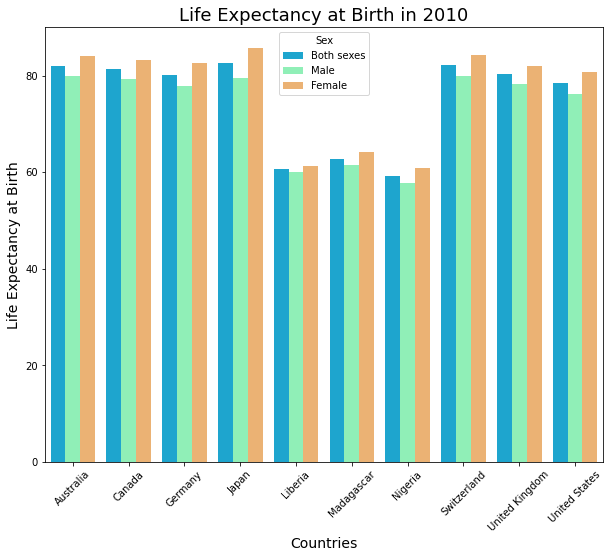

In [15]:
# Bar graph for gender and Life Expectancy among Countries in 2010
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Life_(years)",
    hue = "Sex",
    data = life_2010,
    ci=None,
    palette = ("rainbow"))

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Life Expectancy at Birth in 2010", size=18)
plt.savefig("My Project Images/ 2010 Life Expectancy among gender.png",bbox_inches ="tight")

plt.show()

In [16]:
# rename column head "Population using at least basic drinking-water services (%)" to "Percentage" for drinking water data
drinking_df= drinking_data.rename(columns={"Population using at least basic drinking-water services (%)":"Percentage"})
drinking_df.head()

,Location,Period,Percentage
0,Afghanistan,2017,57.32
1,Afghanistan,2016,54.84
2,Afghanistan,2015,52.39
3,Afghanistan,2014,49.96
4,Afghanistan,2013,47.56


In [17]:
# sort dataframe by country for drinking water 
drinking_df.sort_values(['Location'], ascending=True).head()

,Location,Period,Percentage
0,Afghanistan,2017,57.32
17,Afghanistan,2000,21.62
16,Afghanistan,2001,21.62
15,Afghanistan,2002,23.60
14,Afghanistan,2003,25.58


In [18]:
len(drinking_data["Location"].unique())

195

In [19]:
# count number of countries in the dataframe
drinking_data['Location'].value_counts()

Kenya                               18
Grenada                             18
Malta                               18
Bahamas                             18
Bolivia (Plurinational State of)    18
                                    ..
Poland                              13
Montenegro                          12
Sudan (until 2011)                  11
South Sudan                          7
Sudan                                7
Name: Location, Length: 195, dtype: int64

In [20]:
# Edit the names to shorter names
drinking_df["Location"] = drinking_df["Location"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "United States of America": "United States"})

In [21]:
target_countries = pd.DataFrame(drinking_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United Kingdom', 'United States', 'Liberia', 'Nigeria', 'Madagascar']"))

# get data of years 2000 and 2010 for drinking water
year_2000 = pd.DataFrame(target_countries.query("Period == '2000'"))
year_2010 = pd.DataFrame(target_countries.query("Period == '2010'"))

years = [year_2000,year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Percentage
1831,Madagascar,2000,23.79
2256,Nigeria,2000,34.88
1759,Liberia,2000,49.53
575,Canada,2000,98.18
1561,Japan,2000,98.49
161,Australia,2000,99.06
3310,United States,2000,99.77
1201,Germany,2000,100.00
3007,Switzerland,2000,100.00
3274,United Kingdom,2000,100.00


,Location,Period,Percentage
1821,Madagascar,2010,30.98
2246,Nigeria,2010,46.96
1749,Liberia,2010,57.74
3300,United States,2010,96.97
565,Canada,2010,98.50
1551,Japan,2010,98.73
151,Australia,2010,99.71
1191,Germany,2010,100.00
2997,Switzerland,2010,100.00
3264,United Kingdom,2010,100.00


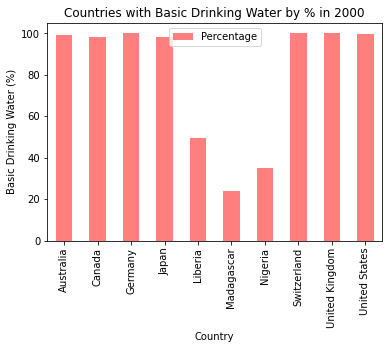

In [22]:
# Year 2000 bar chart of targeted countries' basic drinking services %
year_2000_bar = year_2000.plot.bar('Location', 'Percentage', color = 'red', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by % in 2000')
plt.xlabel("Country")
plt.ylabel("Basic Drinking Water (%)")

plt.savefig("My Project Images/2000 Countries with Basic Drinking Water.png", bbox_inches ="tight")

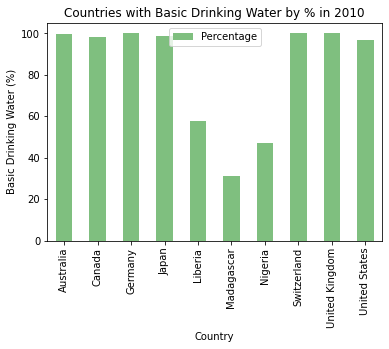

In [23]:
# Year 2010 bar chart of targeted countries' basic drinking services %
year_2010_bar = year_2010.plot.bar('Location', 'Percentage', color = 'green', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by % in 2010')
plt.xlabel("Country")
plt.ylabel("Basic Drinking Water (%)")

plt.savefig("My Project Images/2010 Countries with Basic Drinking Water.png", bbox_inches ="tight")

In [24]:
# print out countries of target
countries = target_countries['Location'].unique()
countries

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

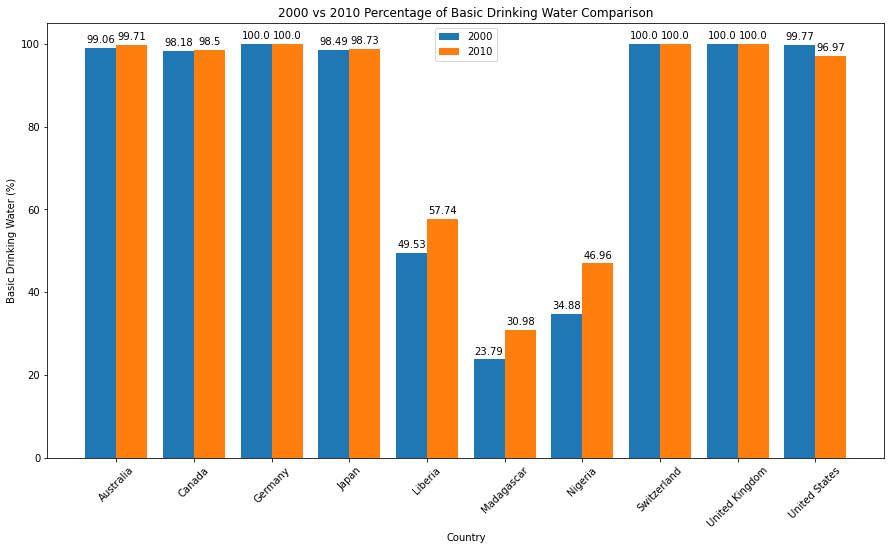

In [25]:
# create a chart combining 2000 and 2010 bar charts for easier comparison of the two years

labels = countries
y = year_2000.Percentage
z = year_2010.Percentage

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()  # fig, ax = plt.subplots() -- this code makes the chart size not changeable 

rects1 = ax.bar(x - width/2, y, width, label='2000')
rects2 = ax.bar(x + width/2, z, width, label='2010')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Basic Drinking Water (%)')
ax.set_title('2000 vs 2010 Percentage of Basic Drinking Water Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

# Attach percentages above each bar in *rects*, displaying its height.
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.savefig("My Project Images/2000 vs 2010 Percentage of Basic Drinking Water Comparison.png", bbox_inches ="tight")
plt.show()

# Resource: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [26]:
import datetime as dt
target_countries['Period'] = [dt.datetime.strptime(str(period), '%Y') for period in target_countries['Period']]
target_countries.head()

,Location,Period,Percentage
144,Australia,2017-01-01,100.00
145,Australia,2016-01-01,100.00
146,Australia,2015-01-01,100.00
147,Australia,2014-01-01,100.00
148,Australia,2013-01-01,99.95


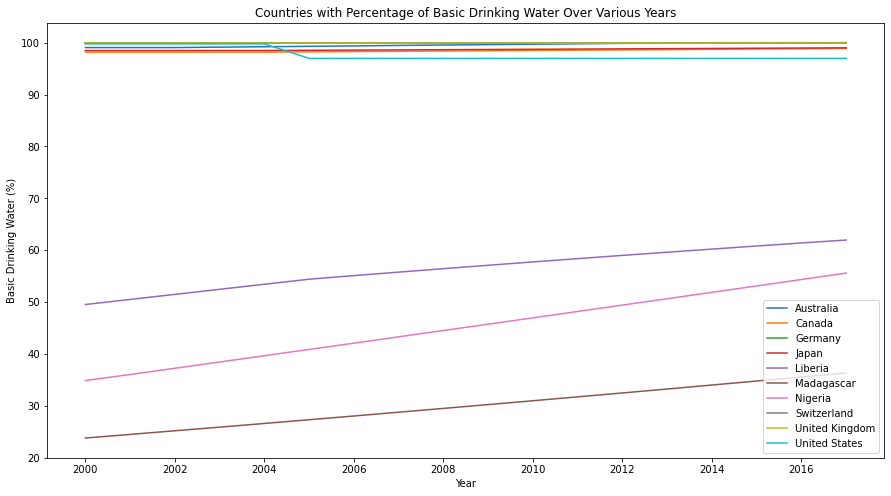

In [27]:
# get line chart to compare countries' drinking water over various years

plt.figure(figsize=(15,8)) 

for country in countries:
    df = target_countries[target_countries['Location']==country]
    plt.plot(df['Period'],df['Percentage'],label=country)

plt.title('Countries with Percentage of Basic Drinking Water Over Various Years')
plt.xlabel("Year")
plt.ylabel('Basic Drinking Water (%)')
plt.legend()

plt.savefig('My Project Images/Countries with Percentage of Basic Drinking Water Over Various Years.png', bbox_inches = 'tight')
plt.show() # plt.show()--needs to be after plt.savefig()

In [28]:
sani_df= sani_data.rename(columns={"Population using at least basic sanitation services (%)":"Percentage"})
sani_df.head()

,Location,Period,Area,Percentage
0,Afghanistan,2017,Total,43.42
1,Afghanistan,2017,Urban,62.26
2,Afghanistan,2017,Rural,37.05
3,Afghanistan,2016,Total,42.05
4,Afghanistan,2016,Urban,59.92


In [29]:
sani_df['Location'] = sani_df['Location'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 
    'United States of America': 'United States'})


In [30]:
# sort dataframe by country for Population using at least basic sanitation services (%)
display(sani_df.sort_values(['Location'], ascending=True))

,Location,Period,Area,Percentage
0,Afghanistan,2017,Total,43.42
29,Afghanistan,2008,Rural,28.43
30,Afghanistan,2007,Total,30.41
31,Afghanistan,2007,Urban,40.18
32,Afghanistan,2007,Rural,27.48
...,...,...,...,...
9335,Zimbabwe,2010,Total,41.05
9336,Zimbabwe,2010,Urban,55.76
9337,Zimbabwe,2010,Rural,33.75
9326,Zimbabwe,2013,Total,38.94


In [31]:
len(sani_df["Location"].unique())

195

In [32]:
target_areas = pd.DataFrame(sani_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United Kingdom', 'United States', 'Liberia', 'Nigeria', 'Madagascar']"))

In [33]:
target_df = target_areas[target_areas["Area"] == 'Total']
areas = target_df['Location'].unique()
areas

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [34]:

target_df['Period'] = [dt.datetime.strptime(str(period), '%Y') for period in target_df['Period']]
target_df.head()

<ipython-input-34-2727818217f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['Period'] = [dt.datetime.strptime(str(period), '%Y') for period in target_df['Period']]


,Location,Period,Area,Percentage
394,Australia,2017-01-01,Total,99.99
395,Australia,2016-01-01,Total,99.99
396,Australia,2015-01-01,Total,99.99
397,Australia,2014-01-01,Total,99.99
398,Australia,2013-01-01,Total,99.99


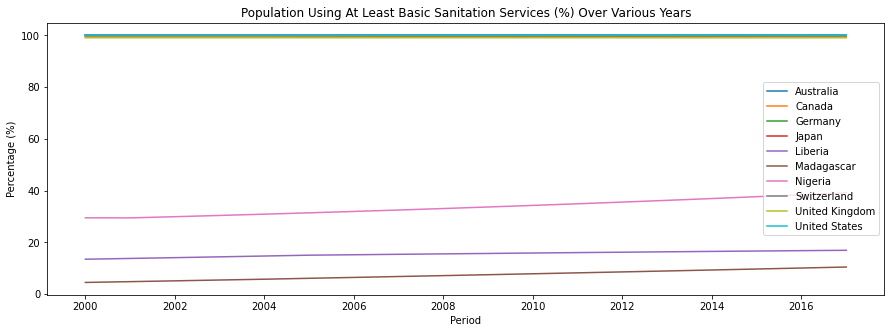

In [35]:
# Population using at least basic sanitation services (%)Over Various Years

plt.figure(figsize=(15,5)) 

for area in areas:
    df = target_df[target_df['Location']==area]
    plt.plot(df['Period'],df['Percentage'],label=area)
plt.title('Population Using At Least Basic Sanitation Services (%) Over Various Years')
plt.xlabel("Period")
plt.ylabel('Percentage (%)')
plt.legend()    

plt.savefig("My Project Images/ Population Using At Least Basic Sanitation Services (%) Over Various Years.png",bbox_inches ="tight")
plt.show()

In [36]:
# get data of years 2000 and 2010 for using Sani water
sani_year_2000 = pd.DataFrame(target_areas.query("Period == '2000'"))
sani_year_2010 = pd.DataFrame(target_areas.query("Period == '2010'"))


years = [sani_year_2000,sani_year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Area,Percentage
4960,Madagascar,2000,Rural,2.73
4780,Liberia,2000,Rural,4.12
4958,Madagascar,2000,Total,4.55
4959,Madagascar,2000,Urban,9.43
4778,Liberia,2000,Total,13.52
4779,Liberia,2000,Urban,25.32
6163,Nigeria,2000,Rural,29.22
6161,Nigeria,2000,Total,29.52
6162,Nigeria,2000,Urban,30.06
3304,Germany,2000,Rural,98.99


,Location,Period,Area,Percentage
4930,Madagascar,2010,Rural,5.00
4750,Liberia,2010,Rural,5.08
4928,Madagascar,2010,Total,7.90
4929,Madagascar,2010,Urban,14.08
4748,Liberia,2010,Total,15.92
4749,Liberia,2010,Urban,27.75
6133,Nigeria,2010,Rural,30.10
6131,Nigeria,2010,Total,34.31
6132,Nigeria,2010,Urban,39.78
3274,Germany,2010,Rural,98.99


In [37]:
# get data for urban and rural only
year_2000_RU = pd.DataFrame(sani_year_2000.query("Area == ['Urban', 'Rural']"))
year_2010_RU = pd.DataFrame(sani_year_2010.query("Area == ['Urban', 'Rural']"))

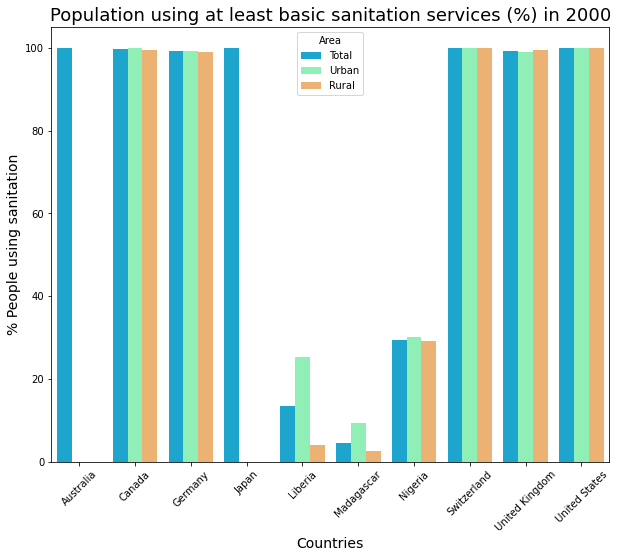

In [38]:
# Bar graph for Population using at least basic sanitation services (%) in 2000
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Percentage",
    hue = "Area",
    data = sani_year_2000,
    ci=None,
    palette = ("rainbow"))

plt.ylabel("% People using sanitation", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Population using at least basic sanitation services (%) in 2000", size=18)
plt.savefig("My Project Images/ 2000 Population using sanitation.png",bbox_inches ="tight")

plt.show()

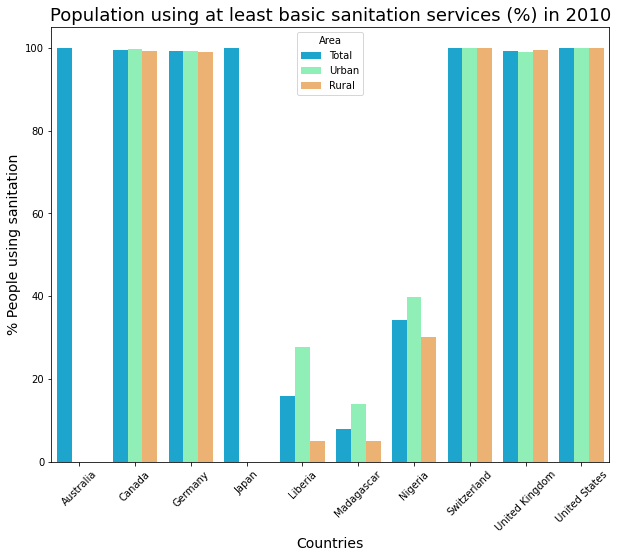

In [39]:
# Bar graph for Population using at least basic sanitation services (%) in 2010
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Percentage",
    hue = "Area",
    data = sani_year_2010,
    ci=None,
    palette = ("rainbow"))

plt.ylabel("% People using sanitation", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Population using at least basic sanitation services (%) in 2010", size=18)
plt.savefig("My Project Images/ 2010 Population using sanitation.png",bbox_inches ="tight")

plt.show()

In [40]:
# define dataframes for "Total" area for 2000 and 2010
year_2000_total = pd.DataFrame(sani_year_2000.query("Area == 'Total'"))
year_2010_total = pd.DataFrame(sani_year_2010.query("Area == 'Total'"))

# display dataframes for preview
display(year_2000_total, year_2010_total)

,Location,Period,Area,Percentage
411,Australia,2000,Total,99.99
1498,Canada,2000,Total,99.78
3302,Germany,2000,Total,99.22
4294,Japan,2000,Total,100.00
4778,Liberia,2000,Total,13.52
4958,Madagascar,2000,Total,4.55
6161,Nigeria,2000,Total,29.52
8137,Switzerland,2000,Total,99.90
8866,United Kingdom,2000,Total,99.13
8974,United States,2000,Total,99.97


,Location,Period,Area,Percentage
401,Australia,2010,Total,99.99
1468,Canada,2010,Total,99.56
3272,Germany,2010,Total,99.22
4284,Japan,2010,Total,99.95
4748,Liberia,2010,Total,15.92
4928,Madagascar,2010,Total,7.90
6131,Nigeria,2010,Total,34.31
8107,Switzerland,2010,Total,99.89
8836,United Kingdom,2010,Total,99.12
8944,United States,2010,Total,99.97


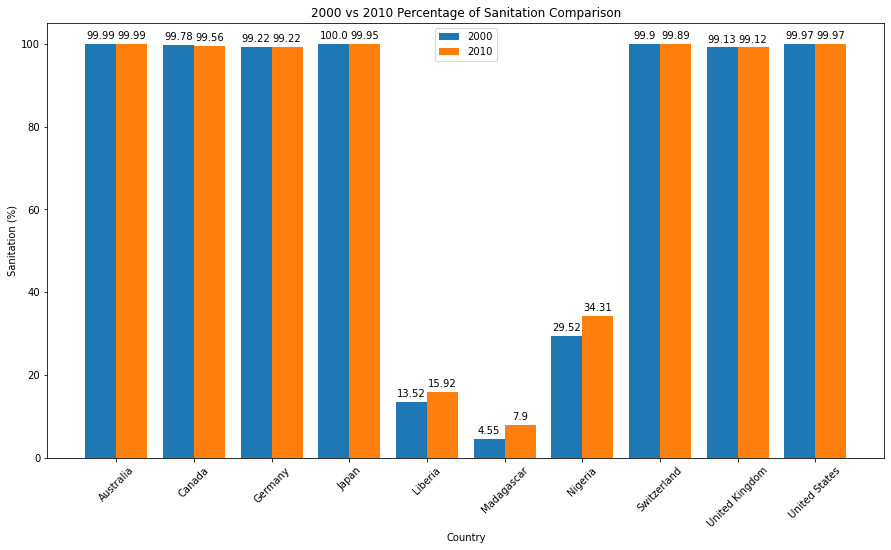

In [41]:
# create a bar chart to compare only the Total area for years 2000 and 2010

labels = countries
y = year_2000_total.Percentage
z = year_2010_total.Percentage

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()  # fig, ax = plt.subplots() -- this code makes the chart size not changeable 

rects1 = ax.bar(x - width/2, y, width, label='2000')
rects2 = ax.bar(x + width/2, z, width, label='2010')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Sanitation (%)')
ax.set_title('2000 vs 2010 Percentage of Sanitation Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

# Attach percentages above each bar in *rects*, displaying its height.
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.savefig("My Project Images/2000 vs 2010 Percentage of Sanitation Comparison.png", bbox_inches ="tight")
plt.show()

In [42]:
# Plot multipe bar chart in matplotlib
# https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
# Plot with seaborn
# https://datavizpyr.com/grouped-barplots-in-python-with-seaborn/